## Andy's CheetSheet

### “In God we trust. All others must bring data.” — W. Deming

In [1]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
from IPython.display import Image

# Suppress Scientific Notation
pd.options.display.float_format = '{:.2f}'.format

# Load DataSet
data = sns.load_dataset('titanic')

# Fillna with Median/Mode
for col_name in data.columns:
    if data[col_name].dtype in ['int64', 'float64']:
        data[col_name] = data[col_name].fillna(data[col_name].median())
    else:
        data[col_name] = data[col_name].fillna(data[col_name].mode()[0])
        
# Set environment settings
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
sns.set(style='ticks', context='notebook', palette='colorblind', font_scale=.5, color_codes=True)      

# !pip install missingno
# import missingno

# Ignorar Warnings
import warnings
warnings.filterwarnings('ignore')

# Open CSV non UTF-8 Encoded:
# with open("M5/Clase_27_Text_Mining/Data/ag_news_reduced.csv", 'rb') as rawdata:
#     import chardet
#     result = chardet.detect(rawdata.read(100000))
# print(result)

# Cuando tenga error de .loc probar esto
# df.loc[idx_nan_age,'Age'].loc[idx_nan_age] = df['Title'].loc[idx_nan_age].map(map_means)

# Filtrado rapido de columnas
# data2 = data.rename(columns={'pclass':'prueba_1', 'sex': 'prueba_2', 'age':'prueba_3'})
# data2.filter(regex='^p') # Empiezan con 'p'

# DataFrames con colores gradientes
# pd.Series.to_frame().style.background_gradient(cmap='summer_r')

# To study
# .filter, .melt, .pivot, .pivot_table, .stack, .unstack, .resample, .crosstab (combine)

# 05 - Pandas I: Limpieza

In [3]:
        '''The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting'''
    
# Melt(reshape): Es como Desnormalizar para acomodar los datos en menos columnas (pero mas filas)
# Los column_names pasan a ser variables categoricas
# id_vars = what we do not wish to melt ; value_vars = what we want to melt
melted = pd.melt(frame=data, id_vars='survived', value_vars=['pclass', 'sex'])

# Pivot(reshape): Lo contrario de Melt, seria como normalizar
# columns=column_name for the discrete variable
unmelted = melted.pivot(index=melted.index, columns='variable', values=None) # no entiendo bien

# Listas por comprension
mask_adults = [age >= 18 for age in data.age] # Like SQL: SELECT, FROM, WHERE


# Applies a function to all the items in a list: map(func,seq) 
list(map(lambda x: not x, mask_adults))

# Convert to Categoricals
data['class'].astype('category')
df['Sex'] = pd.Categorical(df['Sex'])
df = pd.get_dummies(df, drop_first=True) # drop_first = True para evitar Multicollinearity entre las nuevas dos variables

# DropNA y DropDuplicates
data.dropna(axis=1, how='all', thresh=700, inplace=False) # 
data.drop_duplicates(subset=['sex', 'age'], keep='first')
missingno.matrix(data)

# Imputador
from sklearn.impute import SimpleImputer

final_imputer = SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(final_imputer.transform(X_valid))

# Imputation removed column names; put them back
final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.col

# Resampling: Kinda GroupBy for TimeSeries (pending) | 'A': year, 'M': month
data2.resample("A").mean()

# We can interpolete from first value # No se que es esto
data2.resample("M").first().interpolate("linear")
data2.resample("M").mean().interpolate("linear")

# Mutual Information: Is a way of scoring the degree of dependence between two variables 

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U8')) -> None

# 06 - Visualuzacion I: Seaborn

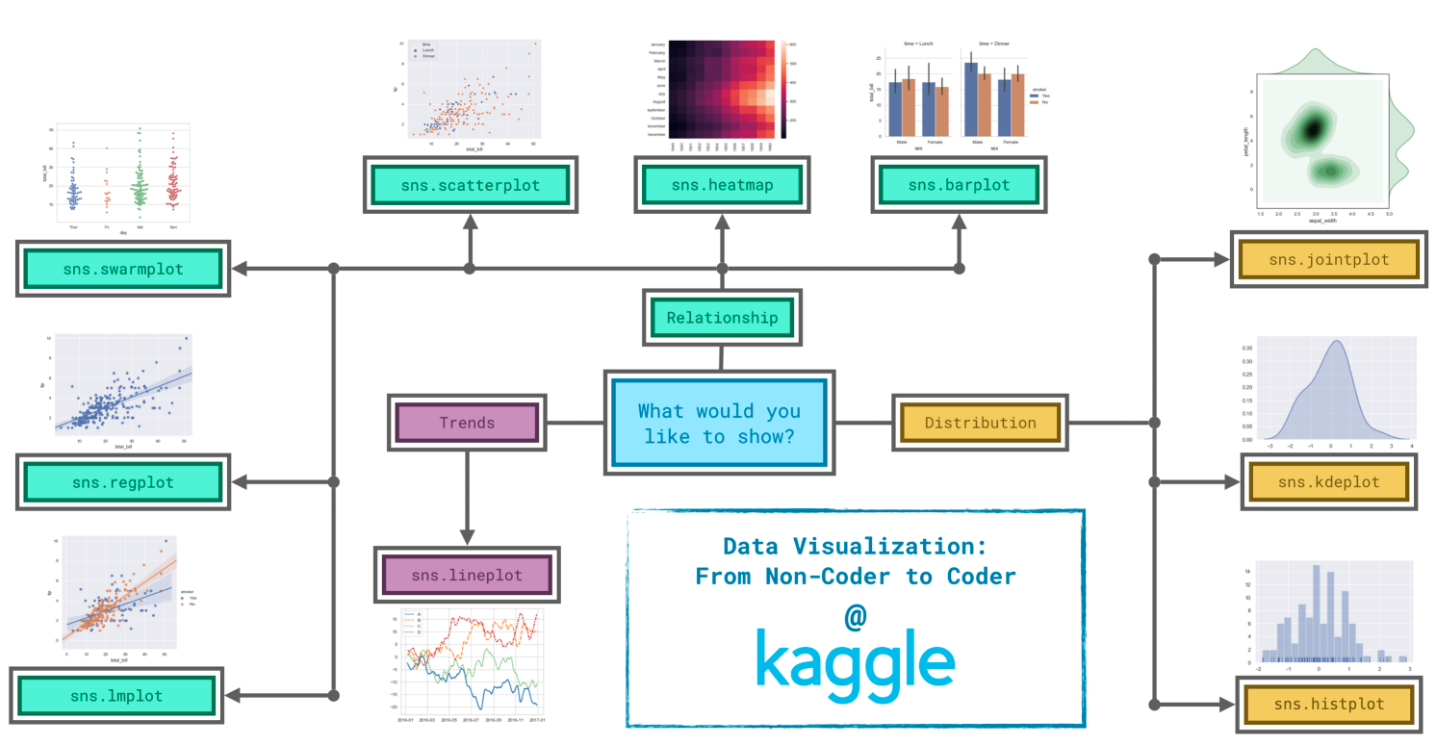

NameError: name 'df_train' is not defined

In [21]:
### FACTORPLOT Para Probabilidades ####
from IPython.display import Image
display(Image(filename='common/Seaborn.png')) # CheetSheet
%matplotlib inline


# Categoricas/Qualitatives: Nominal and Ordinal
# Numericas/Quantitatives: Continuas and Discrete

#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

# IMPORTANTE: Describe para objects
train_df.describe(include=['O'])

# Ploteamos Distribuciones: sns.displot()
data_plot = data_penguins
x='body_mass_g'
y='bill_depth_mm' 
hue='species'
kinds = ['kde', 'hist']
order= data.species.value_counts().index

for i in range(len(kinds)):
    sns.displot(data=data_plot, x=x, y=y, kind=kinds[i], hue=hue)
    
# QQ Plot
st.probplot(data_points, plot=plt)
plt.show()
print(st.shapiro(data_points))
    
# Ploteamos Cantidades: sns.countplot()
sns.countplot(y=data.species, order=data.species.value_counts().index)

# Ploteamos Categorias: sns.catplot()
y = 'SalePrice'
x = 'OverallQual'
data_plot = data
estimator=np.mean #default
kinds = ['box', 'strip', 'bar'] # .boxplot(showfliers=False)

sns.catplot(data=data_plot, x=x, y=y, kind='bar', stacked=True)
sns.pointplot(x=data1.Pclass, y=data1.Survived, hue=data1.Sex, data=data1[data1.Embarked=='S']) # Alternativa BarPlot

# Ploteamos Relaciones: sns.relplot()
size = 'size'
kind = ['scatter', 'line'] # barplot tambien
sns.regplot(data.TV, data.Sales, order=1) # similar al scatterplot pero muestra la recta de la regresion lineal

# HeatMap: Se puede combinar con data.corr(), varibale categorica ordinal necesaria, pivot table necesario
data = data_flights
data_pvt = data.pivot_table(index='month', columns='year', values='passengers')
f, ax = plt.subplots(figsize=(12, 9)) # Para ver el HeatMap completo
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':8}, vmin=-1, vmax=1)

# Exploratory Analysis: sns.pairplot(), variable categorica en hue. sns.PairGrid() para mayor flexibilidad
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();
############# IMPORTANTE Correlacion + p-value ###############
import pingouin as pg
corr = pg.pairwise_corr(data, method='spearman') # Corr alta y p-value < .05

# Comparacion entre Categoricals
g = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

# CheetSheet Seaborn
titanic = sns.load_dataset('titanic')
g = sns.FacetGrid(titanic, col='pclass', row='sex', hue='survived')
g.map(plt.hist, 'age')
g.add_legend()

# Histograma Stackeado
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.legend()

# Subplots (IMPORTANTE)
# sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data) # El que mas muestra
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(ax=ax[0], explode=[0,0.1],
  autopct='%.1f%%', textprops={'fontsize':8}, startangle=90).set_title('Survived')
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# Subplots (CONTINUACION)
plt.figure(figsize=[13,5])
plt.subplot(121)
sns.distplot(fsurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(fnosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Female Age')
plt.subplot(122)
sns.distplot(msurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(mnosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Male Age')

# Objeto fig para manejar tamanos
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

# comparisons across different levels of a categorical variable, 
# we will use a box plot instead of a bar plot.

# 06 - Visualizacion

### Matplotlib (draw almost every object individually)

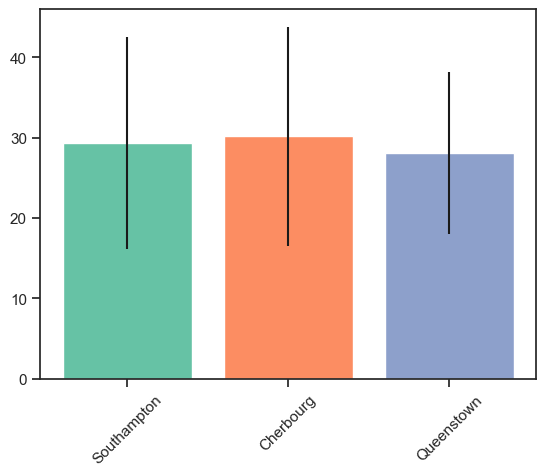

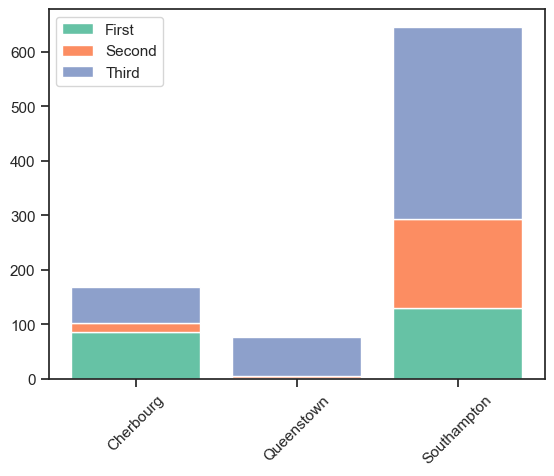

In [3]:
# Tidy Data ONLY
sns.set(style='ticks', context='notebook', palette='Set2')

# Iterative
fig, ax = plt.subplots()
for town in data.embark_town.unique():
    data_town = data[data.embark_town==town]
    ax.bar(town, data_town['age'].mean(), yerr=data_town['age'].std())
ax.set_xticklabels(data.embark_town.unique(), rotation=45)

# Stacked Bars
data_plot = pd.pivot_table(data=data, index=['embark_town'], columns=['class'], aggfunc='count')['age']
fig, ax = plt.subplots()
ax.bar(x=data_plot.index, height=data_plot['First'], label='First')
ax.bar(data_plot.index, data_plot['Second'], label='Second', bottom=data_plot['First'])
ax.bar(data_plot.index, data_plot['Third'], label='Third', bottom=data_plot['First'] + data_plot['Second'])
ax.set_xticklabels(data_plot.index, rotation=45)
ax.legend()


plt.show()

In [7]:
data_plot.index

Index(['Cherbourg', 'Queenstown', 'Southampton'], dtype='object', name='embark_town')

In [6]:
data_plot

class,First,Second,Third
embark_town,,,
Cherbourg,85,17,66
Queenstown,2,3,72
Southampton,129,164,353


### Seborn (draw using DF as base)

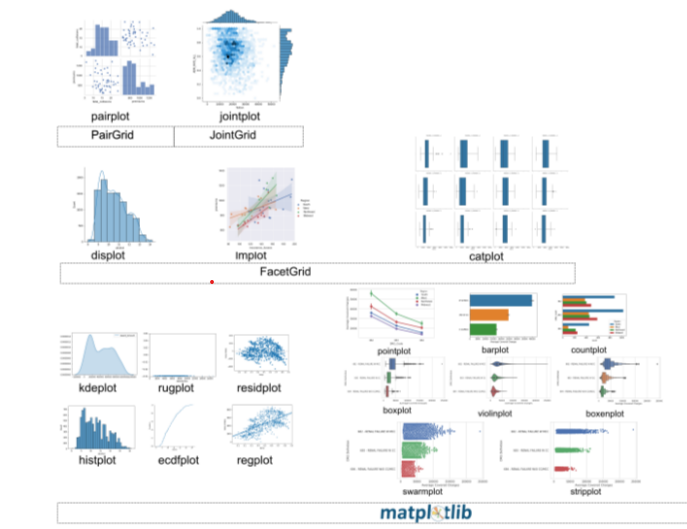

In [2]:
# # Integrated with Pandas Data Structures -> 3 Main types: catplot, displot, relplot (lmplot??)
# # Catplot: -> swarm, stripp (observation) | box, violin (abstract) | count, bar, point (statistical estimates)
# # Displot: -> hist, kde, ecdf -> PairPlot
# # Relplot: -> scatter, line
# # Lmplot: -> reg, resid --> JointPlot

display(Image(filename='common/Seaborn2.png')) # CheetSheet

sns.set(style='ticks', context='notebook', palette='colorblind', font_scale=.75, color_codes=True)
# hue_colors = {'First':'g', 'Second':'yellow', 'Third':'r'}
# point_colors = {'Important': 'red', 'Standard':'blue'}

# # Pallette for Continuous variables -> Single color
# blue_scale_pal = sns.light_palette('steelblue', as_cmap=False)
# sns.palplot(sns.color_palette('Blues', 12))
# # Diverging -> For variables with a natural centre
# div_pal = sns.diverging_palette(250, 0, center='light', n=7, as_cmap=False)
# sns.palplot(sns.color_palette('RdBu', 12))
# #  Circular -> Categorical Nominal Data (nor ordered)
# sns.palplot(sns.color_palette('colorblind', 12))

# Distribution Plots
# g = sns.swarmplot(data=data, x='age', y='class', alpha=0.5) # good for Discrete features

# # Single Category Central Tendency (try 'bar', 'point')
# g = sns.catplot(data=data, x='pclass', hue='survived', kind='count')
# # Distribution Quantitative Feat. grouped by a Category (try 'strip' and 'point')
# g = sns.catplot(data=data, x='class', y='fare', hue='survived', kind='box') # Outliers: sym=''


# # Relational Plots
# #Two Quantitative Features Relation
# g = sns.relplot(data=data, x='age', y='fare', size='pclass', hue='pclass', col='survived', kind='scatter')
# # One Quantitative Feature over Time or Discrete Feature
# g = sns.relplot(data=data, x='age', y='fare', hue='class', kind='line', ci=None)

# # Linear Regresion Plots (lmplot)
# sns.regplot(data=data, x='temp', y='total_rentals', order=2) # Plynomial Regresion
# sns.residplot(data=data, x='temp', y='total_rentals', order=2) # Randmoly Distributed on X


# # Highlights (scatter_kws = {'facecolors': ArrayColorValues} for Matplotlib)
# data['Highlighted'] = ['Important' if (age>=65) & (fare>=data.fare.mean()) else 'Standard' 
#                        for age, fare in zip(data.age, data.fare)]
# g = sns.relplot(kind='scatter', data=data, x='age', y='fare', hue='Highlighted')
# data.drop(columns='Highlighted', inplace=True)

# # Annotations
# data_plot = data[['age', 'fare', 'class', 'deck']].query('deck=="E"')
# # # ScatterPlot
# g = sns.regplot(data=data_plot, x='age', y='fare', ci=False)
# # # Iteration by row, unpack, then label in coordinates
# for _, row in data_plot.iterrows():
#     age, fare, class_, _ = row
#     g.annotate(text=class_, xy=(age, fare))

# # Combining Plots
# fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7, 4))
# sns.histplot(data['age'], ax=ax0)
# sns.histplot(data.query('survived == 1')['age'], ax=ax1)
# ax1.set(ylabel='Count(survived)', xlim=(0, 65))
# ax1.axhline(y=data.query('survived == 1').age.median(), color='red', alpha=.5, label='Median')
# ax1.legend()

# # FacetGrid (2 step process) vs Lmplot (scatter for regresion) and CatPlot
# g = sns.FacetGrid(data, col='class', hue='survived')
# g.map(sns.scatterplot, 'age', 'fare')
# sns.lmplot(data=data, col='class', x='age', y='fare', hue='survived', fit_reg=False) # Equivalent

# sns.despine(right=True, top=True)
# g.set(xlabel='X Label', ylabel='Y Label2')
# g.fig.suptitle('Title Figure', y=1.03) # Title for Figure as a whole
# g.set_titles('Title Column {col_name}') # Titles for each axis Subplot
plt.show()

# 07 - Pandas II: Split (GroupBy) --> Apply (agg, transform, filter) --> Combine

In [ ]:
from IPython.display import Image
# display(Image(filename='common/Feature_Engineering_CheetSheet.png')) # Feature Engineering CheetSheet

### Alternativa al GroupBy ###
tab = pd.crosstab(combine['Embarked'], combine['Pclass']) # Agrupamos
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) # Graficamos

# Using an aggregation function, a group transform combines two features:
# a categorical feature that provides the grouping and another feature whose values you wish to aggregate"

# GroupBy: No olvidarse del reset_index()
# Trae el ID del mas viejo por cada grupo
data.groupby(['sex', 'class']).apply(lambda x: x.loc[x.age.idxmax()])
# Agrupamos, calculamos y completamos con la media por property_type y barrio para el precio m2
data['price_usd_per_m2'] = data.groupby(by=['property_type', 'place_name'])['price_usd_per_m2'].transform(lambda grp: grp.fillna(grp.mean()))

#Vecotres que contienen los IDs de los rows agrupados
data.groupby('class').indices 

data.index = data.pais_residencia_si_extranjero # Asignamos el nombre del pais como Indice Explicito del DF
data_grouped_continente = data.groupby(pais_en_continente_serie) # Deben coincidir los indices del DF con la Serie
data.reset_index(drop=True, inplace=True) # Reseteamos el indice explicito

data_grouped_pais.apply(lambda grp: grp.describe())
data_grouped_pais.filter(lambda grp: grp["pasajeros"].sum() > 1000)
#Tanto 'transform' como 'filter' se aplican a los grupos creados, y no al dataset/serie como hacemos con el 'apply'

# FillNA e imputaciones por grupos
data['Time_teken'] = data['Time_taken'].fillna(data.groupby('Genre')['Time_taken'].transform('mean')) # Completo por los promedios de cada genero

# Transform to Dict for future mapping
genre_grp = data.groupby('Genre')['Time_taken'].mean() # Ojo con esto, diferencia con .transform
genre_dict = genre_grp.to_dict()

# Pivot Tables
bins_age_values = [0, 17, 65, 999]
bins_age_cuartiles = pd.qcut(data.age, q=4)
group_labels = ['menores', 'mayores', 'ancianos']
age_bins = pd.cut(data.age, bins=bins_age_values, labels=group_labels, right='False')
data_pvt = data.pivot_table(index=['sex', age_bins], columns=['class'], aggfunc={'survived':'sum', 'fare':'mean'})
data_pvt.unstack(level=0) # El indice indicado pasa siempre como column secundaria, desapilando

# Merge: Combina filas de dos DataFrames en base a una o más claves. Es análogo al join de SQL.
data1.merge(data2, left_on='abbreviation', left_index=True, right_on='state/region', right_index=True, how='inner', validate='one_to_many')                                                            
                                                            
# Concat: concatena o apila objetos pandas sobre alguno de los ejes
pd.concat([df1, df2], axis=0, verify_integrity=True) # Check if new are duplicated indexes in new df

#Join: Agrega columnas de otro DataFrame, medio complejo porque labura con indices
#left.join(right, how='inner') # Falta Ejemplo

# 08 - Pandas III: Data Wrangling

In [ ]:
from IPython.display import Image
# display(Image(filename='common/SQL.png')) # SQL CheetSheet

# CHEAT: To keep things simple, we'll use only numerical predictors
data.select_dtypes(exclude=['object', 'category'])

# Cuenta cuantas cuantas Categorias tiene cada variable del tipo object: Cardinality
data.select_dtypes(["object"]).nunique()

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in data.columns if
                    data[cname].nunique() <= 2 and 
                    data[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in data.columns if data[cname].dtype in ['int64', 'float64']]

# Manage Duplicated
data.duplicated(subset=['embark_town', 'sex'], keep='first') # Genero vector booleano
data.drop_duplicates(subset=['embark_town', 'sex'], keep='first', inplace=False) # O directamente elimino

# Listas a Diccionario
mapping = dict(zip(valores_viejos, valores_nuevos))
data.state.replace(mapping)

#Metodos mas usados de la Clase String
cadena = '   El submarino, que era de color rojo, segun Barba-larga, se fue volando, creo.'
separador = ','
cadena.split(separador)
cadena.strip()
cadena.find(':')
cadena.count(',')
cadena.replace(',', ';')

# STR Accessor (patrones REGEX mas complicados)
# patron_street = "(?P<numero_calle>\d+[a-z]*)\s(?P<nombre_calle>.+)(?P<sufijo>\sSt|La|Cr|Dr)"
# data.Address.str.extract(patron_street, expand=True)

# Inconsistent Data MOST COMMON ERRORS!!! # pip install fuzzywuzzy
import fuzzywuzzy
from fuzzywuzzy import process
# Another option: thefuzz
# Record Linkage: Some kind of join with using scores on the "index" column

# 11 - Estadistica Inferencial: Ver Resumen

# 13 - Supervised ML

In [ ]:
from IPython.display import Image
display(Image(filename='common/Model_Selection.png')) # CheetSheet
display(Image(filename='common/Scikit-Learn.png')) # CheetSheet

# Regresion vs Clasificacion
from sklearn.linear_model import LinearRegression # Regresion
from sklearn.naive_bayes import GaussianNB # Clasificacion

model = LinearRegression(fit_intercept=True)
model = GaussianNB()

X = data.drop('y', axis=1)
y = data['y']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Scores para Regresion
mean_absolute_error(ytest, ypred)
mean_squared_error(ytest, ypred)
r2_score(ytest, ypred)
model.score(Xtest, ytest)
from sklearn.metrics import accuracy_score #Scores para Clasificacion
accuracy_score(ytest, ypred)

# Cross Validation
from sklearn.model_selection import cross_val_score 
cross_val_score(estimator=LinearRegression(), X=Xtrain, y=ytrain, cv=3)
cross_val_predict(ada,X,Y,cv=10) # Probar este tambien

# 14 - Handling Categorical Variables

In [ ]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
drop_X_train = X_train.select_dtypes(exclude=['object']) # Otra opcion

# Ordinal y Label Encoders: Ordinal para Features Categoricas Ordinales, y Label para la variable Target y
from sklearn.preprocessing import OrdinalEncoder

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

# OneHot Encoder: Para Features Categoricas Nominales
from sklearn.preprocessing import OneHotEncoder

# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10] # Variables de baja cardinalidad

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='if_binary')
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Probar el align
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# 16 - Regresion Lineal Multiple

In [ ]:
# OneHotEncoder y OrdinalEncoder: Calses para crear dummies con sklearn, similar to pd.get_dummies()
from sklearn.preprocessing import OneHotEncoder, OridinalEncoder

encoder_categories = []
for col in Xtrain[cat_cols]:
    col_categories = Xtrain[col].unique()
    encoder_categories.append(col_categories)
    
encoder = OneHotEncoder(categories=encoder_categories, handle_unknown='ignore')
# encoder = OneHotEncoder(categories=encoder_categories, drop='first') # No funca asi

dummy_encoder_Xtrain = encoder.fit_transform(Xtrain[cat_cols])
dummy_encoder_Xtest = encoder.transform(Xtest[cat_cols])

Xtrain_cat = pd.DataFrame(dummy_encoder_Xtrain.toarray(), columns=encoder.get_feature_names(cat_cols))
Xtest_cat = pd.DataFrame(dummy_encoder_Xtest.toarray(), columns=encoder.get_feature_names(cat_cols))

# Clase para normalizar datos con sklearn
# If the features are already directly comparable (like a test result at different times), then you would not want to rescale.
from sklearn import preprocessing
# Normalizacion Scale
xs = preprocessing.scale(df["NOX"])
ys = preprocessing.scale(df["TAX"])

# Normalizacion Min-Max
scaler = preprocessing.MinMaxScaler()
xs = scaler.fit_transform(df[["NOX"]])
ys = scaler.fit_transform(df[["TAX"]]) #No se si esto esta bien o es solo .transform

# Stats Model
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary

# 17 - Regularizacion y Descenso del Gradiente

In [ ]:
rlmcv = linear_model.RidgeCV(alphas=alphas, cv=3, normalize=True, scoring='r2')
lassocv = linear_model.LassoCV(alphas=alphas, cv=3, normalize=True)
print('Coeficientes:', dict(zip(X.columns.values, model.coef_)))
print ("Alpha:", model.alpha_)

# 19 - KNN

In [ ]:
# La Frontera de Desicion cambia segun el hiperparametro k
# Mas alto el k mas simple el modelo (sesgo) y menos flexible, ya que me dejo llevar mas por la mayoria
# Metrica Similitud Manhatan computacionalmente mas barata, ya que no trabaja con raices

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
kf = KFold(n_splits=5, shuffle=True)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y)
for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i+1)
    cv_scores = cross_val_score(model, cv=kf, X=Xtrain, y=ytrain)
    dict_scores = {'n_neighbros': i+1, 'media': cv_scores.mean(), 'std_dv':cv_scores.std()}
    scores_final.append(dict_scores)

best_k = df_scores.loc[df_scores.media == df_scores.media.max()].n_neighbros.values[0]
model2 = KNeighborsClassifier(n_neighbors=best_k)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)


# 21 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
sns.pairplot(df, hue=y)
df.corr()[['y']]
logistic_regression.predict_proba(X).round(2)

# Cambiando el umbral default de 0.5
# Grafico la prob de estar enfermo (columna 1 del .predict_proba), tanto para los sanos como para los enfermos (y_train=0/1)
sns.distplot(lr.predict_proba(X_train_std[y_train==0])[:,1])
sns.distplot(lr.predict_proba(X_train_std[y_train==1])[:,1])
# Luego graficamente anlizo donde me combiene poner el umbral
umbral = 0.2
probs = logistic_regression.predict_proba(Xtrain_scaled)[:,1] # Probabilidades de estar enfermo
ypred_umbral = probs > umbral # Solo los que tinenen probs > que mi umbral

# Cada una de las 4 clases tiene sus propios coeficientes e interceptos. Generalizando:
- .coef_ tendrá forma (N_clases, N_features)
- .intercept_ tendrá forma (N_clases,)

# StatsModels
import statsmodels.api as sm
Xtrain_stats = sm.add_constant(Xtrain_scaled)
logit = sm.Logit(ytrain, Xtrain_stats).fit()

# 22 - Naive Bayes

$$P(L|features) = \frac{P(features|L) * P(L)}{P(features)}$$

In [ ]:
# Sumatorias de Probabilidades Condicionales, recomendad cuando las nubes de puntos estan bien desconectadas

from sklearn.naive_bayes import GaussianNB

numerical_columns = [col for col in data.columns if data[col].dtypes != 'object']

# 23a - Evaluacion de Modelos

In [ ]:
# Precision(-FP): TP/SUM(Columna). Que porcentaje de los predichos positivos realmente lo son. Importa SPAM
# Recall(-FN): TP/SUM(Fila). Que porcentaje de reales positivos pudo detectar. Importa Churn
# Specificity/TNR: Similar a Recall pero con reales negativos (TN/TN+FP)
# FPR: (1-TNR)

### Evaluacion de Modelos ###
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Specificity and FPR a manopla
from sklearn.metrics import roc_curve, auc 

FPR,TPR,THR = roc_curve(y_test, y_pred_proba[:,1])  # No se que hacemos con THR
AUC= auc(FPR, TPR) # Area Under Curve

TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Clasification Report
from sklearn.metrics import classification_report
print (classification_report(ytest, ypred))

# 23b - Grid/Random Search

In [ ]:
# La manera mas facil de interpretarlo
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

### Grid/Randmize Search ###
# Creamos el Fold
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, shuffle=True)

# Seleccionamos e Instanciamos el modelo (sin hiperparametros)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Definimos y creamos la Grilla de Hiperparametros a probar en forma de dict
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors = k_range, weights=weight_options) # Conocer el nombre de HiperParametros

# Instanciamos el GridSearh con todos los ojetos y entrenamos
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model_rnd = RandomizedSearchCV(estimator=knn, param_grid=param_grid,cv=folds, scoring='accuracy', n_iter=20 )
model_rnd.fit(Xtrain, ytrain)
ypred_rnd = model_rnd.predict(Xtest)

# Vemos solo los mejores parametros (ya calculados)
print('Best Estimator:', model_rnd.best_estimator_)
print('Top Score:', model_rnd.best_score_)
print('Top Params:', model_rnd.best_params_, '\n')
display(pd.DataFrame(model_rnd.cv_results_))

# Imprimo distitnos scores
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

print('R2:', r2_score(ytest, ypred).round(3))
print('MSE:', mean_squared_error(ytest, ypred_rnd).round(3))
print('MAE:', mean_absolute_error(ytest, ypred_rnd).round(3))
print('Accuracy:', accuracy_score(ytest, ypred_rnd).round(3)) # Solo para clasificadores

# 24 - Reduccion de Dimensionalidad (PCA)

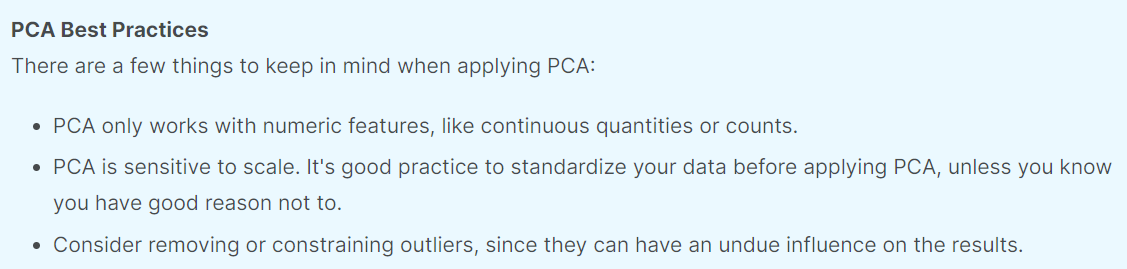

NameError: name 'df' is not defined

In [3]:
# Best Practices
display(Image(filename='common/PCA.png'))

# Probar esto
print(df[features].corrwith(df.SalePrice))

# PCA (lineales): Transformacion nuevo Sist de Coord, generando pocos Componentes Principales de peso
from sklearn.decomposition import PCA

# 1) Se instancia el scaler y se fitea con el viejo df
std_sclr = StandardScaler()
df_std = pd.DataFrame(std_sclr.fit_transform(df), index=df.index, columns=df.columns)

# 2) Se instancia el PCA y se fitea con el nuevo df
pca_arrests = PCA(n_components=None) # Genera tantas PCA como variables, ya que no indico nada
pca_arrests.fit(df_std)

# 3) Se calculan los Componentes mas importantes, descartando las menos significativas. Simplificando asi el modelo 
print('Explicabilidad de cada Componente:', pca_arrests.explained_variance_ratio_.round(2))
plt.plot([1, 2, 3, 4], np.cumsum(pca_arrests.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('% de varianza explicada');

# 4) Tambien calculamos sus loadings (dandosele formato de DataFrame)
df_loadings = pd.DataFrame(pca_arrests.components_.T, index=df.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
display('Loadings: Peso de cada variable original para cada a Componente (correlatividad)', df_loadings.head())

# 5) Y por ultimo, los Datos resultantes en el nuevo espacio reducido de Componentes.
df_pca = pd.DataFrame(pca_arrests.fit_transform(df_std), columns=['PC1', 'PC2', 'PC3', 'PC4'],\
                      index=df_std.index)
display("Datos reducidos en el nuevo espacio", df_pca.head().loc[:,['PC1', 'PC2']])


# 25 - Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
# 1: Clasificacion Cluster Correcta, -1: Clasificacion Cluster Vecino, 0: En el medio de ambos clusters

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

inertia = []
silhouette = []
calinski = []

k_values = range(2, 10)

for k in k_values:
    model_km = KMeans(n_clusters=k, n_init=10)
    model_km.fit(X)
    silhouette.append(silhouette_score(X, model_km.labels_))
    calinski.append(calinski_harabasz_score(X, model_km.labels_))
    inertia.append(model_km.inertia_)

# Cluster Jerarcico: scipy, dendogram
# DBSCAN: MinPoints y EPS - Core, Border and Noise points

# cross tabulation table
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

# Plot Inertia
plt.plot(range(0,8),inertia_list,'-o')

# 26 - Pipelines

In [ ]:
from sklearn.pipeline import make_pipeline, make_union
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):

    def __init__(self, columns):
        self.columns = columns
    
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            return pd.DataFrame(X[self.columns])
        else:
            raise TypeError("Este Transformador solo funciona en DF de Pandas")
    
    def fit(self, X, *_):
        return self

pipe_age = make_pipeline(ColumnSelector('Age'), SimpleImputer(), StandardScaler())
pipe_fare = make_pipeline(ColumnSelector('Fare'), StandardScaler())
union = make_union(pipe_age, pipe_fare)

pipeline = Pipeline([
                ('union', union),
                ('log', LogisticRegression(solver='liblinear'))])

param_grid = {'log__penalty': ['l1', 'l2'],
              'log__C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=folds, n_jobs=5)
grid_search.fit(pd.DataFrame(Xtrain, columns=X.columns), ytrain)
ypred = grid_search.predict(Xtest)

print(grid_search.best_estimator)
print(grid_search.best_parameters)
print(classification_report(ytest, ypred))
print(accuracy_score(ytest, ypred))

# 27 - Text Mining (b: train_test_split diferente)

In [ ]:
# Supervised Machine Learning vs Rules and Lexicons
# Pre-Procesamiento: str.lower(), n-gramas('casa rosada'), steamming/leamming, stopwords
# Tokenización: convertir cada documento a una lista de palabras (y signos de puntuación) que lo componen.
# Construcción de un vocabulario: colectar todas las palabras que se registraron en el corpus y ordenarlas (típicamente por orden alfabético).
# Encoding: representar los documentos como vectores en el espacio de las palabras del vocabulario
import pandas as pd

data=pd.read_csv('M5/Clase_27_Text_Mining/Data/ag_news_reduced.csv')
data['documents'] = data.title + ' ' + data.description # Genero la columna de Documents
data.drop(columns=['class_name', 'title', 'description'], inplace=True)
# display(data)


# Descargo las stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
stopwords_en=stopwords.words('english')
# stop_words=[unidecode.unidecode(word.lower()) for word in stop_words_sp ]; # quitamos acentos

# Genero la transformacion con CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# TF-IDF: Optimiza espacio descartando tokens repetidos en varios documentos
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.decomposition import TruncatedSVD # Ver SVD, tipo PCA
from sklearn.model_selection import train_test_split # No se si esto va aca
from sklearn.naive_bayes import MultinomialNB
vectorizer=CountVectorizer(stop_words=stopwords_en, lowercase=True, strip_accents='unicode', max_df=50) # Instancio con stopwords
Train, Test = train_test_split(data, stratify=data['class'], random_state=3)
vectorizer.fit(Train['documents']) # Generar la Matriz de palabras

Xtrain = vectorizer.transform(Train['documents']) # Transforma el documento a una entrada en la Matriz de palabras
ytrain = Train['class']
Xtest = vectorizer.transform(Test['documents'])
ytest = Test['class']
# print(vectorizer.vocabulary_)


# Genero el modelo predictivo con NB, como con cualquier otro modelo
# from sklearn.naive_bayes import MultinomialNB
model_nb= MultinomialNB()
model_nb.fit(Xtrain, ytrain) # Xtrain.todense()?
ypred= model_nb.predict(Xtest) # Xtest.todense()?
print('R2:', model_nb.score(Xtest, ytest).round(3))

# 31 - Desicion Trees

In [ ]:
# Ver parte #3 de este kernell: 
# https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv("M5/CLASE_31_CART/Data/Movie_classification.csv", header=0)

# Completo vacios con promedios por Genre
data['Time_taken'].fillna(data.groupby('Genre')['Time_taken'].transform('mean'), inplace=True)
# print(data.info())

# Separo en X Features, y target
X = pd.get_dummies(data, drop_first=True)
X = X.drop(columns='Start_Tech_Oscar')
y = data.Start_Tech_Oscar

# Separo Train, Test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=.3)

# Normalizamos los datos en Xscaled, pero no lo usamos
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# Xtrain = scaler.fit_transform(Xtrain)
# Xtest = scaler.transform(Xtest)

# Genero meta-modelo con Bagging y un clasificatopm tree
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # No entiendo RandomForest

# Genero Clasificador simmple y el ensamblador
model_clf = tree.DecisionTreeClassifier(criterion='gini')
model_bclf = BaggingClassifier(base_estimator=model_clf, n_estimators=1000, bootstrap=True, n_jobs=-1)
model_bclf.fit(Xtrain, ytrain)

# Mido
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(ytest, model_bclf.predict(Xtest))
display(sns.heatmap(cm, annot=True, fmt='d'))
print('Score:', accuracy_score(ytest, model_bclf.predict(Xtest)))

# Importancia lo muestro en el Clasificador Simple porque el Baggin no lo tiene
model_clf.fit(Xtrain, ytrain)
importancia_df = pd.DataFrame({'Atributo':X.columns, 'Importancia': model_clf.feature_importances_}).sort_values(by='Importancia', ascending=False)
display(importancia_df)
# Puedo medir el RandomForest teniendo en cuenta la proporcionde clasificaciones correctas de los Out-of-Bag records

# El plot del arbol tambien lo muestro con el Clasificador Simple
from IPython.display import Image
import pydotplus

data_dot = tree.export_graphviz(model_clf, feature_names=X.columns, filled=True)
graph = pydotplus.graph_from_dot_data(data_dot)
display(Image(graph.create_png()))

In [ ]:
tot = data.shape[0]
mask_1 = data.survived==1
mask_2 = mask_1 & (data.sex == 'female')

data[mask_2].shape[0]/tot